<a href="https://colab.research.google.com/github/Dhyoga/BigDataAnalytics/blob/main/Klasifikasi_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [34]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris = pandas.read_csv(url, names=names)

In [35]:
X = iris.drop('species', axis=1)
y = iris['species']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [37]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = classifier.predict(X_test)


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 10  0]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [40]:
df=pandas.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
122,Iris-virginica,Iris-virginica
41,Iris-setosa,Iris-setosa
148,Iris-virginica,Iris-virginica
14,Iris-setosa,Iris-setosa
23,Iris-setosa,Iris-setosa
16,Iris-setosa,Iris-setosa
92,Iris-versicolor,Iris-versicolor
107,Iris-virginica,Iris-virginica
43,Iris-setosa,Iris-setosa
85,Iris-versicolor,Iris-versicolor


In [41]:
X.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
y.columns = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

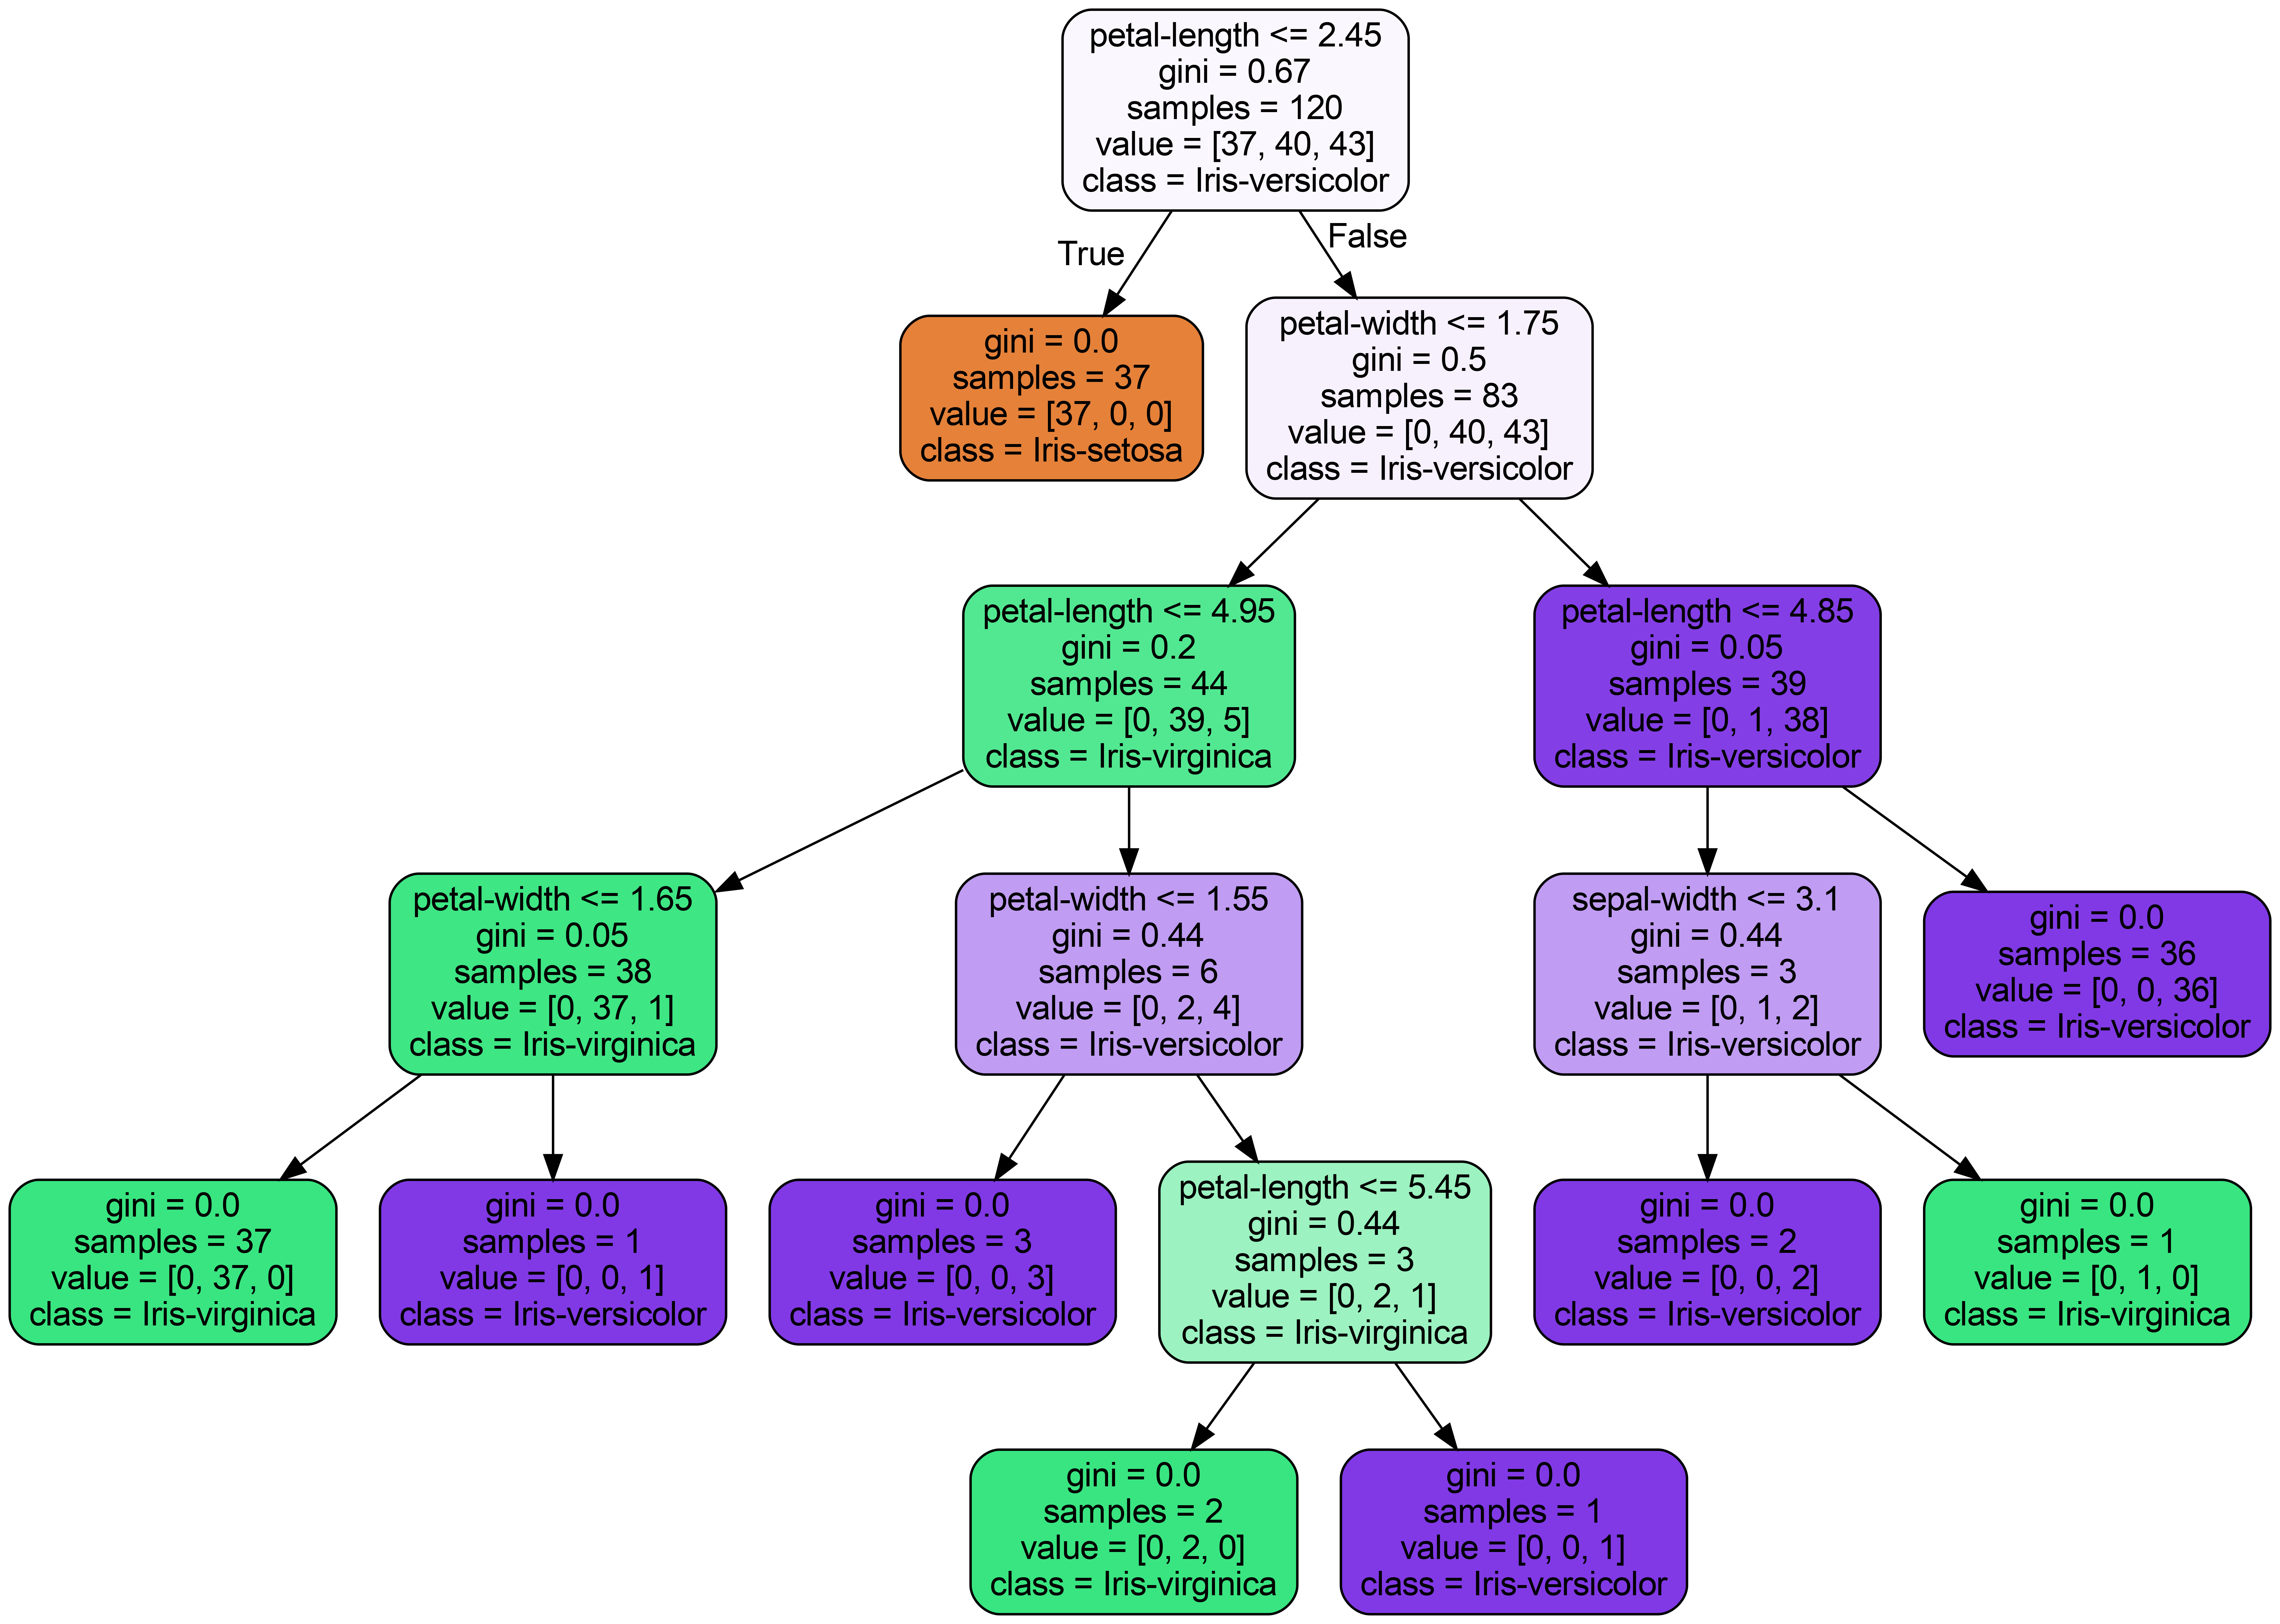

In [44]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(classifier, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = y.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')